In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    precision_recall_curve
)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
df = pd.read_csv('../data/lemmatizer.csv', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   keyword                  6422 non-null   object 
 1   location                 4332 non-null   object 
 2   text                     6478 non-null   object 
 3   target                   6478 non-null   int64  
 4   stop_word_count          6478 non-null   int64  
 5   mean_word_length         6478 non-null   float64
 6   char_count               6478 non-null   int64  
 7   punctuation_count        6478 non-null   int64  
 8   hashtag_count            6478 non-null   int64  
 9   presence_url             6478 non-null   int64  
 10  hashtags                 1501 non-null   object 
 11  mentions                 1689 non-null   object 
 12  urls                     3497 non-null   object 
 13  tokens                   6478 non-null   object 
 14  clean_text              

In [5]:
df = df[[c for c in df.columns 
                    if df[c].dtype != 'object' or c in ['text']]]

df.head(10)

,text,target,stop_word_count,mean_word_length,char_count,punctuation_count,hashtag_count,presence_url,has_top10_hashtag,has_top10_keyword,has_top_bigram,nb_words_in_cooc_class1
0,motogp indianapolis espargaro layout worrie...,0,2,8.909091,108,15,0,1,0,0,0,0
1,rt the devereaux disaster exciting scifi,0,1,9.000000,109,15,3,1,0,0,0,0
2,this bed looks like a war zone,0,3,3.571429,31,1,0,0,0,0,0,0
3,i hate people who tweet receipts but know it...,0,11,4.360000,134,5,0,0,0,0,0,0
4,police kill hatchet wielding gunman who opened...,1,1,8.266667,138,11,0,1,0,0,0,1
5,u s national park services tonto national fore...,1,3,6.315789,138,11,0,1,0,0,0,0
6,and by doing this you re enabling the possible...,0,8,7.000000,135,7,0,0,0,0,0,0
7,do you feel engulfed with low self image take...,0,4,7.583333,102,13,0,1,0,0,0,0
8,survivors remorse is good,0,1,5.500000,25,0,0,0,0,0,0,0
9,umm because a gun stopped the gunman with who ...,1,7,4.928571,82,2,0,0,0,0,0,0


In [6]:
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df["text"].fillna(""))

X_num = StandardScaler().fit_transform(
    df.select_dtypes(include=[np.number]).drop(columns=["target"])
)

X = hstack([X_text, X_num])

y = df["target"].values
X.shape, y.shape

((6478, 12619), (6478,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

In [22]:
y_test.shape

(648,)

In [8]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 5))
    
    
    plt.figure(figsize=(8, 5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [9]:
dict_of_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

training models:   0%|          | 0/5 [00:00<?, ?it/s]

LogisticRegression
[[262  62]
 [ 85 239]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       324
           1       0.79      0.74      0.76       324

    accuracy                           0.77       648
   macro avg       0.77      0.77      0.77       648
weighted avg       0.77      0.77      0.77       648

DecisionTree
[[229  95]
 [110 214]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       324
           1       0.69      0.66      0.68       324

    accuracy                           0.68       648
   macro avg       0.68      0.68      0.68       648
weighted avg       0.68      0.68      0.68       648

RandomForest
[[271  53]
 [101 223]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       324
           1       0.81      0.69      0.74       324

    accuracy                           0.76       648
   macro avg  

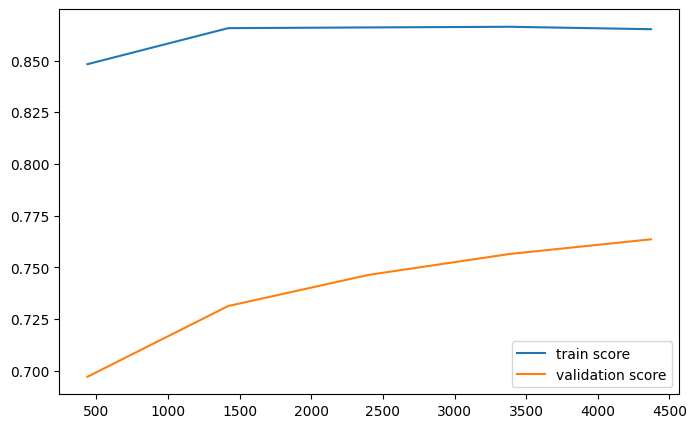

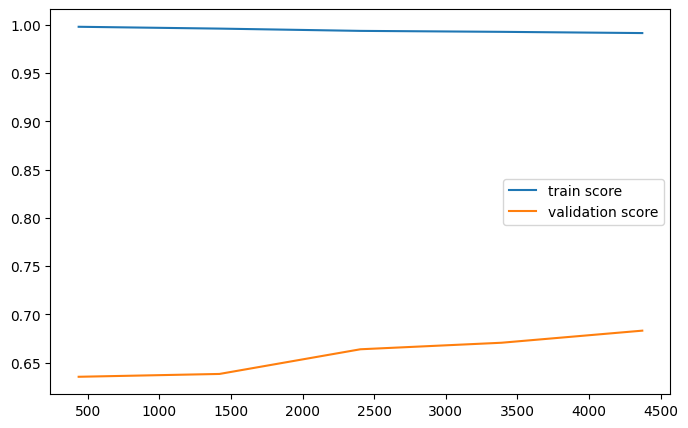

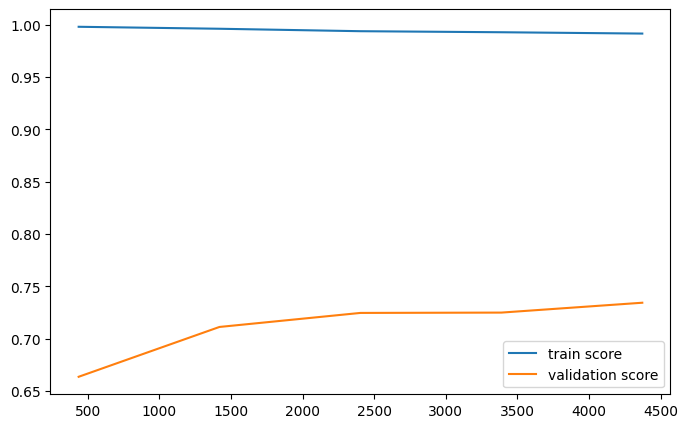

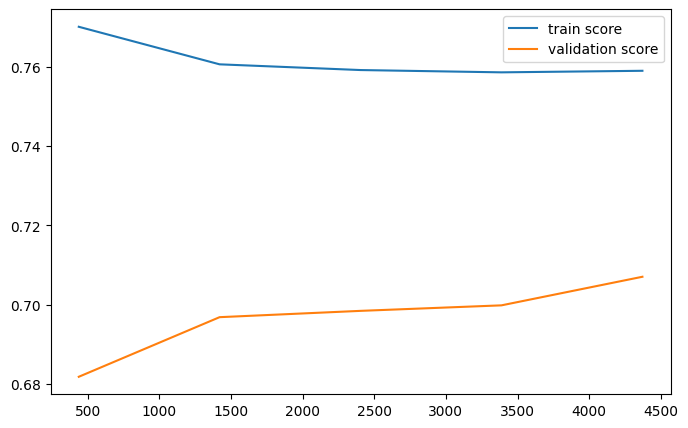

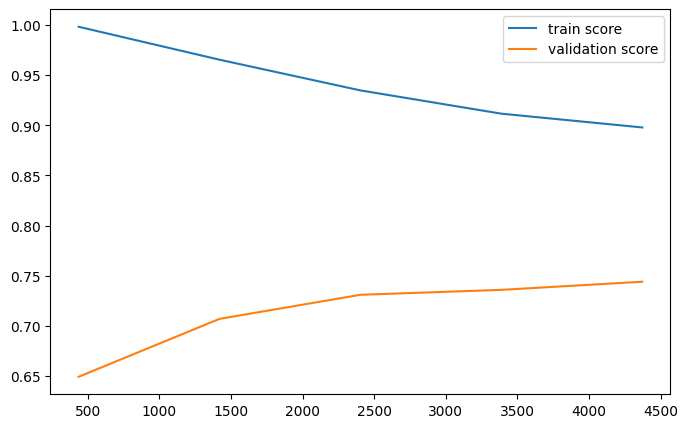

In [10]:
for name, model in tqdm(dict_of_models.items(), desc="training models"):
    print(name)
    evaluation(model)

- Démarche

Nous avons séparé notre jeu de données en 90% pour l’apprentissage et 10% pour le test.

Après l’entraînement, nous avons mesuré l'accuracy, le recall et le score F1.

La courbe d’apprentissage montre l’évolution des performances en fonction de la taille de l’échantillon d’entraînement, nous avons entraîné chaque modèle plusieurs fois, en utilisant des sous-ensembles représentant 10%, 20%, … jusqu’à 100% des données disponibles pour l’apprentissage.

Le validation score mesure la performance du model sur des donnée d'entrainement, il permet de le descriminer sur des données encore jamais vues.

Cela permet d'analyser la convergence, l'overfitting et le potentiel avec plus de données.

- Interprétation

Sur nos données, LR obtient nativement le meilleur score F1 (0.76) parmi les modèles testés.
Il représente un équilibre entre la précision et recall, une bonne généralisation, nous nous focalisons sur celui de la classe 1 car c'est ce que nous cherchons à prédire.

Nous avons donc choisi de conserver LR comme modèle de base et de procéder à un fine tuning afin de tenter d’améliorer encore ses performances.

### LR

Nous n'obtenons pas de meilleurs résultats

In [ ]:
param_grids = {
    LogisticRegression: {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    
    DecisionTreeClassifier: {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10],
        'criterion': ['gini', 'entropy']
    },
    
    RandomForestClassifier: {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 20],
        'min_samples_split': [2, 10]
    },
    
    SVC: {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    
    XGBClassifier: {
        'n_estimators': [50, 100],
        'max_depth': [3, 6],
        'learning_rate': [0.1, 0.2]
    }
}

def compare_model_performance(model_class, model_name=None, **model_params):
    if model_name is None:
        model_name = model_class.__name__
    
    print(f"\n{'='*60}")
    print(f"🔍 COMPARAISON: {model_name}")
    print(f"{'='*60}")
    
    print("\n📊 MODÈLE DE BASE (sans optimisation)")
    print("-" * 40)
    
    base_model = model_class(**model_params)
    base_model.fit(X_train, y_train)
    base_pred = base_model.predict(X_test)
    
    base_accuracy = accuracy_score(y_test, base_pred)
    base_f1 = f1_score(y_test, base_pred, average='weighted')
    
    print(f"Accuracy: {base_accuracy:.4f}")
    print(f"F1 Score: {base_f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, base_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, base_pred))
    
    # 2. Modèle optimisé (avec Grid Search)
    print(f"\n🚀 MODÈLE OPTIMISÉ (avec Grid Search)")
    print("-" * 40)
    
    if model_class in param_grids:
        grid_search = GridSearchCV(
            estimator=model_class(**model_params),
            param_grid=param_grids[model_class],
            cv=3,  # CV réduite pour plus de rapidité
            scoring='f1_weighted',
            n_jobs=-1,
            verbose=0
        )
        
        print("⏳ Grid Search en cours...")
        grid_search.fit(X_train, y_train)
        
        optimized_model = grid_search.best_estimator_
        optimized_pred = optimized_model.predict(X_test)
        
        optimized_accuracy = accuracy_score(y_test, optimized_pred)
        optimized_f1 = f1_score(y_test, optimized_pred, average='weighted')
        
        print(f"✅ Meilleurs paramètres trouvés:")
        for param, value in grid_search.best_params_.items():
            print(f"   {param}: {value}")
        
        print(f"\nAccuracy: {optimized_accuracy:.4f}")
        print(f"F1 Score: {optimized_f1:.4f}")
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, optimized_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, optimized_pred))
        
    else:
        print(f"❌ Pas de grille d'hyperparamètres définie pour {model_name}")
        optimized_accuracy = base_accuracy
        optimized_f1 = base_f1
        optimized_model = base_model
    
    # 3. Comparaison des résultats
    print(f"\n📈 AMÉLIORATION")
    print("-" * 40)
    
    accuracy_improvement = optimized_accuracy - base_accuracy
    f1_improvement = optimized_f1 - base_f1
    
    print(f"Accuracy: {base_accuracy:.4f} → {optimized_accuracy:.4f} ({accuracy_improvement:+.4f})")
    print(f"F1 Score: {base_f1:.4f} → {optimized_f1:.4f} ({f1_improvement:+.4f})")
    
    if f1_improvement > 0:
        print(f"✅ Amélioration de {f1_improvement:.4f} points de F1 Score!")
    elif f1_improvement == 0:
        print("➡️  Pas d'amélioration (modèle déjà optimal)")
    else:
        print(f"⚠️  Légère dégradation de {abs(f1_improvement):.4f} points")
    
    # Retour des résultats
    results = {
        'model_name': model_name,
        'base': {
            'model': base_model,
            'accuracy': base_accuracy,
            'f1_score': base_f1
        },
        'optimized': {
            'model': optimized_model,
            'accuracy': optimized_accuracy,
            'f1_score': optimized_f1,
            'best_params': grid_search.best_params_ if model_class in param_grids else None
        },
        'improvement': {
            'accuracy': accuracy_improvement,
            'f1_score': f1_improvement
        }
    }
    
    return results

In [21]:
models_to_test = [
        (LogisticRegression, {'max_iter': 1000}),
        (DecisionTreeClassifier, {}),
        (RandomForestClassifier, {}),
        (SVC, {}),
        (XGBClassifier, {'eval_metric': 'logloss'})
    ]
    
all_results = []

for model_class, params in models_to_test:
    result = compare_model_performance(model_class, **params)
    all_results.append(result)

# Résumé final
print(f"\n{'='*80}")
print("📊 RÉSUMÉ FINAL - COMPARAISON DE TOUS LES MODÈLES")
print(f"{'='*80}")

print(f"{'Modèle':<20} {'Base F1':<10} {'Optimisé F1':<12} {'Amélioration':<12}")
print("-" * 60)

for result in all_results:
    base_f1 = result['base']['f1_score']
    opt_f1 = result['optimized']['f1_score']
    improvement = result['improvement']['f1_score']
    
    print(f"{result['model_name']:<20} {base_f1:<10.4f} {opt_f1:<12.4f} {improvement:<12.4f}")



🔍 COMPARAISON: LogisticRegression

📊 MODÈLE DE BASE (sans optimisation)
----------------------------------------
Accuracy: 0.7731
F1 Score: 0.7729

Confusion Matrix:
[[262  62]
 [ 85 239]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       324
           1       0.79      0.74      0.76       324

    accuracy                           0.77       648
   macro avg       0.77      0.77      0.77       648
weighted avg       0.77      0.77      0.77       648


🚀 MODÈLE OPTIMISÉ (avec Grid Search)
----------------------------------------
⏳ Grid Search en cours...
✅ Meilleurs paramètres trouvés:
   C: 10
   penalty: l2
   solver: liblinear

Accuracy: 0.7685
F1 Score: 0.7685

Confusion Matrix:
[[246  78]
 [ 72 252]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       324
           1       0.76      0.78      0.77       324

    accuracy